In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
def read_and_save_asc(asc_file_path, csv_file_path):
    # Lire le fichier .ASC
    data = []
    with open(asc_file_path, 'r') as file:
        for line in file:
            # Supposons que les valeurs sont séparées par des espaces
            values = line.strip().split()
            data.append(values)
    
    # Convertir les données en DataFrame
    df = pd.DataFrame(data)
    
    # Couper les trois premières colonnes
    df = df.iloc[:, 3:]
    
    # Renommer les colonnes
    df.columns = ['temps', 'amplitude']
    
    # Sauvegarder en CSV
    df.to_csv(csv_file_path, index=False)
    print(f'Le fichier CSV a été sauvegardé sous {csv_file_path}')
    
    return df
    
def find_intervals(df):
    intervals = []
    start_index = 0
    for i in range(1, len(df)):
        if df['temps'].iloc[i] < df['temps'].iloc[i - 1]:
            intervals.append([start_index, i])
            start_index = i
    intervals.append([start_index, len(df)])
    print(intervals)
    return intervals


def create_segments(df, intervals):
    segments = [df.iloc[start_idx:end_idx] for start_idx, end_idx in intervals]
    print(f"Nombre de segments: {len(segments)}")
    for idx, segment in enumerate(segments):
        print(f"Segment {idx + 1}:\n{segment}\n")
    return segments

def calculate_intervals_and_counts(segments):
    time_intervals = []
    line_counts = []
    for segment in segments:
        start_time = float(segment['temps'].iloc[0])
        end_time = float(segment['temps'].iloc[-1])
        interval = end_time - start_time
        line_count = len(segment)
        time_intervals.append(interval)
        line_counts.append(line_count)
    
    for i, (interval, count) in enumerate(zip(time_intervals, line_counts)):
        print(f"Segment {i + 1}: Intervalle de temps = {interval:.6f} secondes, Nombre de lignes = {count}")
    
    total_intervals = len(time_intervals)
    total_lines = sum(line_counts)
    print(f"Total des segments : {total_intervals}, Total des lignes : {total_lines}")
    return time_intervals, line_counts


def generate_amplitude_matrix(segments):
    num_points = len(segments)
    num_time_instances = max(len(segment) for segment in segments)
    amplitude_matrix = np.zeros((num_time_instances, num_points))
    for i, segment in enumerate(segments):
        for j in range(len(segment)):
            amplitude_matrix[j, i] = float(segment['amplitude'].iloc[j])
    time_values = [float(time) for time in segments[0]['temps']]
    amplitude_df = pd.DataFrame(amplitude_matrix, columns=[f'Point {i+1}' for i in range(num_points)], index=[f'{time:.6f}' for time in time_values])
    return amplitude_df




4L2-petit bac et tuyau au milieu

In [3]:
asc_file_path = r"C:\Users\kamar\OneDrive\Bureau\stage\Experimentation\Experimentation\2e essai- petit bac et petit tuyau au milieu\4L2-petit bac et tuyau au milieu.ASC"
csv_file_path=r"C:\Users\kamar\OneDrive\Bureau\stage\Experimentation\Experimentation\2e essai- petit bac et petit tuyau au milieu\4L2-petit bac et tuyau au milieu.csv"
df = read_and_save_asc(asc_file_path, csv_file_path)

Le fichier CSV a été sauvegardé sous C:\Users\kamar\OneDrive\Bureau\stage\Experimentation\Experimentation\2e essai- petit bac et petit tuyau au milieu\4L2-petit bac et tuyau au milieu.csv


In [5]:
df

,temps,amplitude
0,0.000000,1710.000000
1,0.000610,660.000000
2,0.001221,876.000000
3,0.001831,969.000000
4,0.002441,1005.000000
...,...,...
303099,4.996948,1143.000000
303100,4.997559,1159.000000
303101,4.998169,1161.000000
303102,4.998779,1166.000000


In [8]:
intervals = find_intervals(df)


[[0, 8192], [8192, 16384], [16384, 24576], [24576, 32768], [32768, 40960], [40960, 49152], [49152, 57344], [57344, 65536], [65536, 73728], [73728, 81920], [81920, 90112], [90112, 98304], [98304, 106496], [106496, 114688], [114688, 122880], [122880, 131072], [131072, 139264], [139264, 147456], [147456, 155648], [155648, 163840], [163840, 172032], [172032, 180224], [180224, 188416], [188416, 196608], [196608, 204800], [204800, 212992], [212992, 221184], [221184, 229376], [229376, 237568], [237568, 245760], [245760, 253952], [253952, 262144], [262144, 270336], [270336, 278528], [278528, 286720], [286720, 294912], [294912, 303104]]


In [12]:
segments = create_segments(df, intervals)

time_intervals, line_counts = calculate_intervals_and_counts(segments)


Nombre de segments: 37
Segment 1:
         temps    amplitude
0     0.000000  1710.000000
1     0.000610   660.000000
2     0.001221   876.000000
3     0.001831   969.000000
4     0.002441  1005.000000
...        ...          ...
8187  4.996948  1189.000000
8188  4.997559  1185.000000
8189  4.998169  1187.000000
8190  4.998779  1186.000000
8191  4.999390  1186.000000

[8192 rows x 2 columns]

Segment 2:
          temps    amplitude
8192   0.000000  1707.000000
8193   0.000610   651.000000
8194   0.001221   867.000000
8195   0.001831   957.000000
8196   0.002441  1000.000000
...         ...          ...
16379  4.996948  1159.000000
16380  4.997559  1170.000000
16381  4.998169  1169.000000
16382  4.998779  1161.000000
16383  4.999390  1161.000000

[8192 rows x 2 columns]

Segment 3:
          temps    amplitude
16384  0.000000  1708.000000
16385  0.000610   648.000000
16386  0.001221   863.000000
16387  0.001831   959.000000
16388  0.002441   996.000000
...         ...          ...
24571

In [14]:
def generate_amplitude_matrix(segments):
    num_points = len(segments)
    num_time_instances = max(len(segment) for segment in segments)
    amplitude_matrix = np.zeros((num_time_instances, num_points))
    for i, segment in enumerate(segments):
        for j in range(len(segment)):
            amplitude_matrix[j, i] = float(segment['amplitude'].iloc[j])
    time_values = [float(time) for time in segments[0]['temps']]
    amplitude_df = pd.DataFrame(amplitude_matrix, columns=[f'Point {i+1}' for i in range(num_points)], index=[f'{time:.6f}' for time in time_values])
    return amplitude_df


In [16]:
amplitude_df = generate_amplitude_matrix(segments)

In [18]:
amplitude_df

,Point 1,Point 2,Point 3,Point 4,Point 5,Point 6,Point 7,Point 8,Point 9,Point 10,...,Point 28,Point 29,Point 30,Point 31,Point 32,Point 33,Point 34,Point 35,Point 36,Point 37
0.000000,1710.0,1707.0,1708.0,1704.0,1712.0,1720.0,1733.0,1720.0,1728.0,1723.0,...,1713.0,1703.0,1727.0,1707.0,1704.0,1705.0,1720.0,1712.0,1730.0,1731.0
0.000610,660.0,651.0,648.0,662.0,670.0,682.0,679.0,687.0,683.0,685.0,...,660.0,664.0,659.0,662.0,645.0,649.0,648.0,656.0,674.0,689.0
0.001221,876.0,867.0,863.0,870.0,891.0,890.0,898.0,901.0,903.0,902.0,...,878.0,880.0,876.0,874.0,869.0,870.0,873.0,875.0,888.0,910.0
0.001831,969.0,957.0,959.0,965.0,983.0,982.0,988.0,996.0,990.0,995.0,...,971.0,978.0,969.0,968.0,965.0,963.0,965.0,968.0,987.0,996.0
0.002441,1005.0,1000.0,996.0,1003.0,1018.0,1023.0,1028.0,1032.0,1029.0,1028.0,...,1009.0,1014.0,1007.0,1002.0,997.0,1001.0,999.0,1017.0,1026.0,1027.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4.996948,1189.0,1159.0,1145.0,1148.0,1166.0,1230.0,1275.0,1270.0,1231.0,1221.0,...,1118.0,1063.0,1030.0,1091.0,1129.0,1236.0,1339.0,1383.0,1297.0,1143.0
4.997559,1185.0,1170.0,1154.0,1150.0,1167.0,1223.0,1284.0,1243.0,1255.0,1210.0,...,1160.0,1027.0,995.0,1098.0,1146.0,1232.0,1333.0,1400.0,1303.0,1159.0
4.998169,1187.0,1169.0,1155.0,1147.0,1170.0,1208.0,1302.0,1260.0,1252.0,1230.0,...,1091.0,1024.0,1018.0,1095.0,1115.0,1228.0,1347.0,1398.0,1308.0,1161.0
4.998779,1186.0,1161.0,1154.0,1160.0,1166.0,1241.0,1284.0,1276.0,1241.0,1213.0,...,1085.0,1112.0,1043.0,1013.0,1151.0,1233.0,1341.0,1401.0,1308.0,1166.0


In [20]:
amplitude_df.to_csv(r"C:\Users\kamar\OneDrive\Bureau\stage\Experimentation\Experimentation\2e essai- petit bac et petit tuyau au milieu\4L2-petit bac et tuyau au milieu matrix.csv")

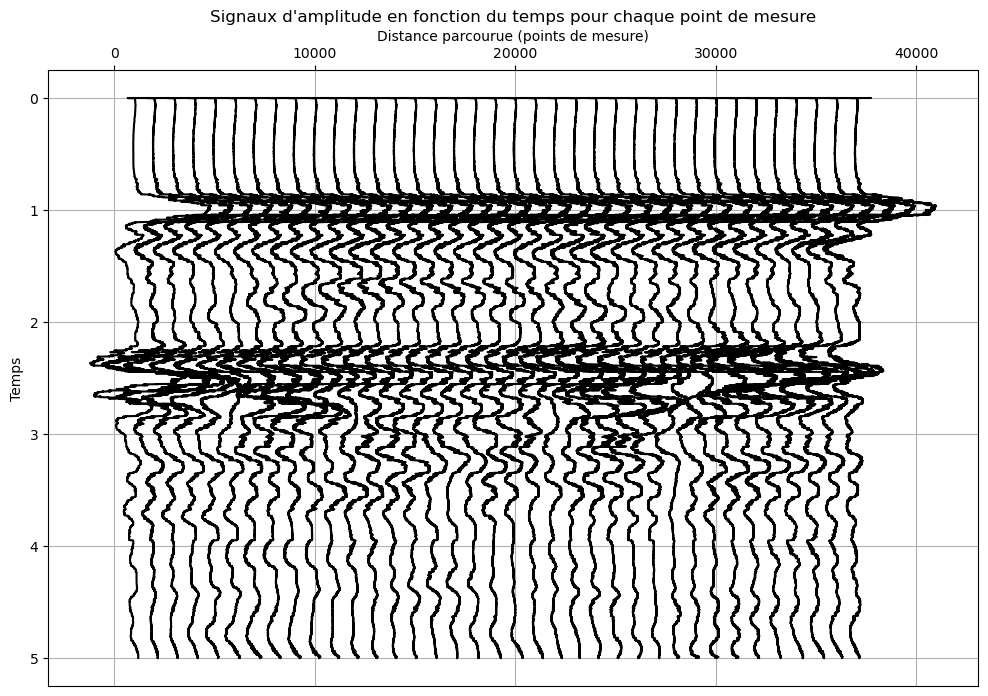

In [24]:
amplitude_matrix_path = r"C:\Users\kamar\OneDrive\Bureau\stage\Experimentation\Experimentation\2e essai- petit bac et petit tuyau au milieu\4L2-petit bac et tuyau au milieu matrix.csv"
amplitude_matrix_df = pd.read_csv(amplitude_matrix_path, index_col=0)

# Convertir les données en une matrice pour faciliter la manipulation
amplitude_matrix = amplitude_matrix_df.values
plt.figure(figsize=(12, 8))

# Décalage vertical pour chaque courbe pour éviter le chevauchement
offset = 1000

# Tracer les signaux pour chaque point de mesure en fonction du temps
for i in range(amplitude_matrix.shape[1]):
    plt.plot(amplitude_matrix[:, i] + i * offset, amplitude_matrix_df.index, color='k')

# Inverser l'axe y pour que le temps soit vertical
plt.gca().invert_yaxis()

# Placer l'axe x en haut
plt.gca().xaxis.set_ticks_position('top')
plt.gca().xaxis.set_label_position('top')

# Ajouter les étiquettes et le titre
plt.xlabel('Distance parcourue (points de mesure)')
plt.ylabel('Temps')
plt.title('Signaux d\'amplitude en fonction du temps pour chaque point de mesure')
plt.grid(True)

# Afficher le graphique
plt.show()

In [26]:
def crop_amplitude_matrix(amplitude_matrix, amplitude_df):
    # Demander les paramètres de découpe à l'utilisateur
    cut_top = int(input("Entrez la valeur pour couper la partie supérieure: "))
    cut_bottom = int(input("Entrez la valeur pour couper la partie inférieure: "))
    cut_left = int(input("Entrez la valeur pour couper la partie gauche: "))
    cut_right = int(input("Entrez la valeur pour couper la partie droite: "))
    
    # Couper les parties supérieure, inférieure, droite et gauche
    amplitude_matrix_cropped = amplitude_matrix[cut_top:-cut_bottom, cut_left:-cut_right]
    index_cropped = amplitude_matrix_df.index[cut_top:-cut_bottom]  # nouveau intervalle de temps

    # Créer un nouveau DataFrame avec les valeurs découpées
    columns_cropped = amplitude_matrix_df.columns[cut_left:-cut_right]
    amplitude_df_cropped = pd.DataFrame(amplitude_matrix_cropped, columns=columns_cropped, index=index_cropped)
    
    return amplitude_matrix_cropped, index_cropped, amplitude_df_cropped

# Exécution de la fonction de prétraitement
amplitude_matrix_cropped, index_cropped, amplitude_df_cropped = crop_amplitude_matrix(amplitude_matrix_df.values, amplitude_matrix_df)


Entrez la valeur pour couper la partie supérieure:  1500
Entrez la valeur pour couper la partie inférieure:  4900
Entrez la valeur pour couper la partie gauche:  1
Entrez la valeur pour couper la partie droite:  1


In [28]:
amplitude_df_cropped.to_csv(r"C:\Users\kamar\OneDrive\Bureau\stage\Experimentation\Experimentation\2e essai- petit bac et petit tuyau au milieu\4L2-petit bac et tuyau au milieu matrix modifiee.csv")

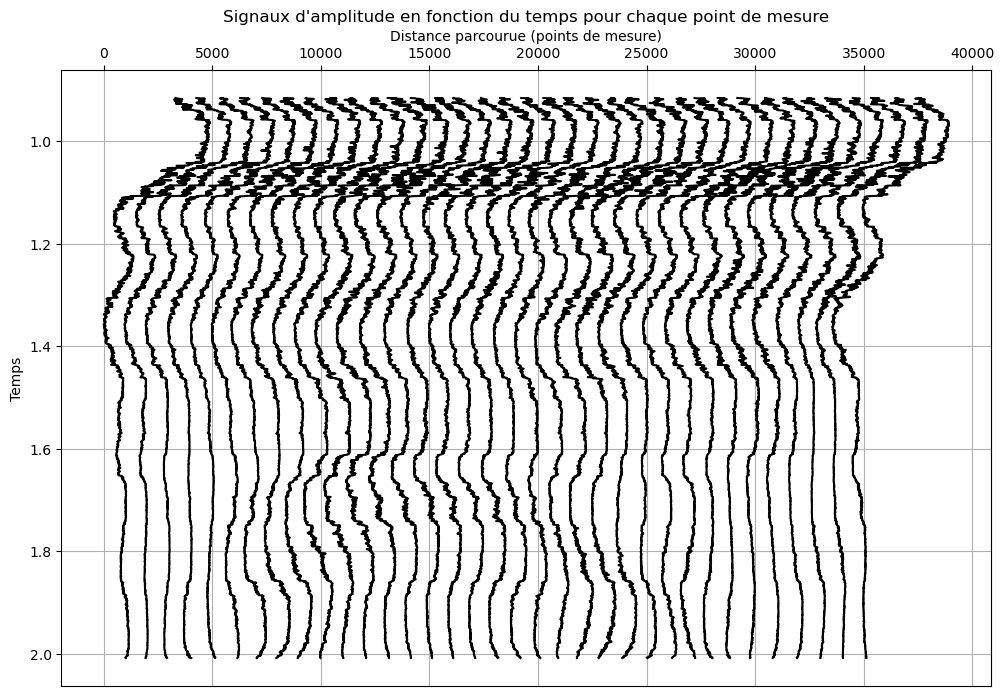

In [30]:
amplitude_matrix_path =r"C:\Users\kamar\OneDrive\Bureau\stage\Experimentation\Experimentation\2e essai- petit bac et petit tuyau au milieu\4L2-petit bac et tuyau au milieu matrix modifiee.csv"
amplitude_matrix_df = pd.read_csv(amplitude_matrix_path, index_col=0)

# Convertir les données en une matrice pour faciliter la manipulation
amplitude_matrix = amplitude_matrix_df.values
plt.figure(figsize=(12, 8))

# Décalage vertical pour chaque courbe pour éviter le chevauchement
offset = 1000

# Tracer les signaux pour chaque point de mesure en fonction du temps
for i in range(amplitude_matrix.shape[1]):
    plt.plot(amplitude_matrix[:, i] + i * offset, amplitude_matrix_df.index, color='k')

# Inverser l'axe y pour que le temps soit vertical
plt.gca().invert_yaxis()

# Placer l'axe x en haut
plt.gca().xaxis.set_ticks_position('top')
plt.gca().xaxis.set_label_position('top')

# Ajouter les étiquettes et le titre
plt.xlabel('Distance parcourue (points de mesure)')
plt.ylabel('Temps')
plt.title('Signaux d\'amplitude en fonction du temps pour chaque point de mesure')
plt.grid(True)

# Afficher le graphique
plt.show()

In [32]:
asc_file_path2 = r"C:\Users\kamar\OneDrive\Bureau\stage\Experimentation\Experimentation\2e essai- petit bac et petit tuyau au milieu\12,5L2-petit bac et tuyau au milieu.ASC"
csv_file_path2=r"C:\Users\kamar\OneDrive\Bureau\stage\Experimentation\Experimentation\2e essai- petit bac et petit tuyau au milieu\12,5L2-petit bac et tuyau au milieu.csv"
df = read_and_save_asc(asc_file_path2, csv_file_path2)


Le fichier CSV a été sauvegardé sous C:\Users\kamar\OneDrive\Bureau\stage\Experimentation\Experimentation\2e essai- petit bac et petit tuyau au milieu\12,5L2-petit bac et tuyau au milieu.csv


In [34]:
df

,temps,amplitude
0,0.000000,1563.000000
1,0.000610,678.000000
2,0.001221,867.000000
3,0.001831,962.000000
4,0.002441,997.000000
...,...,...
270331,4.996948,512.000000
270332,4.997559,491.000000
270333,4.998169,502.000000
270334,4.998779,501.000000


In [36]:
intervals = find_intervals(df)


[[0, 8192], [8192, 16384], [16384, 24576], [24576, 32768], [32768, 40960], [40960, 49152], [49152, 57344], [57344, 65536], [65536, 73728], [73728, 81920], [81920, 90112], [90112, 98304], [98304, 106496], [106496, 114688], [114688, 122880], [122880, 131072], [131072, 139264], [139264, 147456], [147456, 155648], [155648, 163840], [163840, 172032], [172032, 180224], [180224, 188416], [188416, 196608], [196608, 204800], [204800, 212992], [212992, 221184], [221184, 229376], [229376, 237568], [237568, 245760], [245760, 253952], [253952, 262144], [262144, 270336]]


In [38]:
segments = create_segments(df, intervals)


Nombre de segments: 33
Segment 1:
         temps    amplitude
0     0.000000  1563.000000
1     0.000610   678.000000
2     0.001221   867.000000
3     0.001831   962.000000
4     0.002441   997.000000
...        ...          ...
8187  4.996948   336.000000
8188  4.997559   338.000000
8189  4.998169   341.000000
8190  4.998779   340.000000
8191  4.999390   340.000000

[8192 rows x 2 columns]

Segment 2:
          temps    amplitude
8192   0.000000  1567.000000
8193   0.000610   670.000000
8194   0.001221   855.000000
8195   0.001831   952.000000
8196   0.002441   986.000000
...         ...          ...
16379  4.996948   565.000000
16380  4.997559   588.000000
16381  4.998169   584.000000
16382  4.998779   545.000000
16383  4.999390   545.000000

[8192 rows x 2 columns]

Segment 3:
          temps    amplitude
16384  0.000000  1575.000000
16385  0.000610   663.000000
16386  0.001221   857.000000
16387  0.001831   945.000000
16388  0.002441   977.000000
...         ...          ...
24571

In [40]:
time_intervals, line_counts = calculate_intervals_and_counts(segments)


Segment 1: Intervalle de temps = 4.999390 secondes, Nombre de lignes = 8192
Segment 2: Intervalle de temps = 4.999390 secondes, Nombre de lignes = 8192
Segment 3: Intervalle de temps = 4.999390 secondes, Nombre de lignes = 8192
Segment 4: Intervalle de temps = 4.999390 secondes, Nombre de lignes = 8192
Segment 5: Intervalle de temps = 4.999390 secondes, Nombre de lignes = 8192
Segment 6: Intervalle de temps = 4.999390 secondes, Nombre de lignes = 8192
Segment 7: Intervalle de temps = 4.999390 secondes, Nombre de lignes = 8192
Segment 8: Intervalle de temps = 4.999390 secondes, Nombre de lignes = 8192
Segment 9: Intervalle de temps = 4.999390 secondes, Nombre de lignes = 8192
Segment 10: Intervalle de temps = 4.999390 secondes, Nombre de lignes = 8192
Segment 11: Intervalle de temps = 4.999390 secondes, Nombre de lignes = 8192
Segment 12: Intervalle de temps = 4.999390 secondes, Nombre de lignes = 8192
Segment 13: Intervalle de temps = 4.999390 secondes, Nombre de lignes = 8192
Segment 

In [42]:
amplitude_df = generate_amplitude_matrix(segments)

In [44]:
amplitude_df

,Point 1,Point 2,Point 3,Point 4,Point 5,Point 6,Point 7,Point 8,Point 9,Point 10,...,Point 24,Point 25,Point 26,Point 27,Point 28,Point 29,Point 30,Point 31,Point 32,Point 33
0.000000,1563.0,1567.0,1575.0,1576.0,1569.0,1555.0,1562.0,1565.0,1566.0,1568.0,...,1558.0,1563.0,1574.0,1556.0,1562.0,1571.0,1576.0,1571.0,1573.0,1573.0
0.000610,678.0,670.0,663.0,658.0,651.0,646.0,642.0,632.0,638.0,633.0,...,635.0,642.0,644.0,644.0,635.0,649.0,649.0,660.0,666.0,674.0
0.001221,867.0,855.0,857.0,849.0,839.0,835.0,831.0,822.0,824.0,827.0,...,833.0,836.0,837.0,833.0,819.0,837.0,840.0,850.0,855.0,859.0
0.001831,962.0,952.0,945.0,943.0,936.0,929.0,927.0,920.0,919.0,920.0,...,916.0,926.0,929.0,928.0,913.0,931.0,934.0,941.0,948.0,952.0
0.002441,997.0,986.0,977.0,979.0,971.0,965.0,960.0,955.0,957.0,956.0,...,964.0,963.0,969.0,963.0,960.0,958.0,967.0,985.0,979.0,988.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4.996948,336.0,565.0,498.0,582.0,605.0,592.0,613.0,689.0,727.0,754.0,...,881.0,886.0,868.0,821.0,787.0,920.0,859.0,551.0,465.0,512.0
4.997559,338.0,588.0,602.0,647.0,608.0,654.0,634.0,689.0,722.0,765.0,...,872.0,883.0,829.0,853.0,900.0,911.0,885.0,582.0,518.0,491.0
4.998169,341.0,584.0,578.0,678.0,599.0,620.0,649.0,696.0,714.0,763.0,...,864.0,876.0,818.0,802.0,867.0,895.0,876.0,607.0,519.0,502.0
4.998779,340.0,545.0,639.0,671.0,587.0,628.0,667.0,694.0,743.0,748.0,...,892.0,874.0,840.0,817.0,849.0,916.0,850.0,583.0,504.0,501.0


In [46]:
amplitude_df.to_csv( r"C:\Users\kamar\OneDrive\Bureau\stage\Experimentation\Experimentation\2e essai- petit bac et petit tuyau au milieu\12,5L2-petit bac et tuyau au milieu matrix.csv")

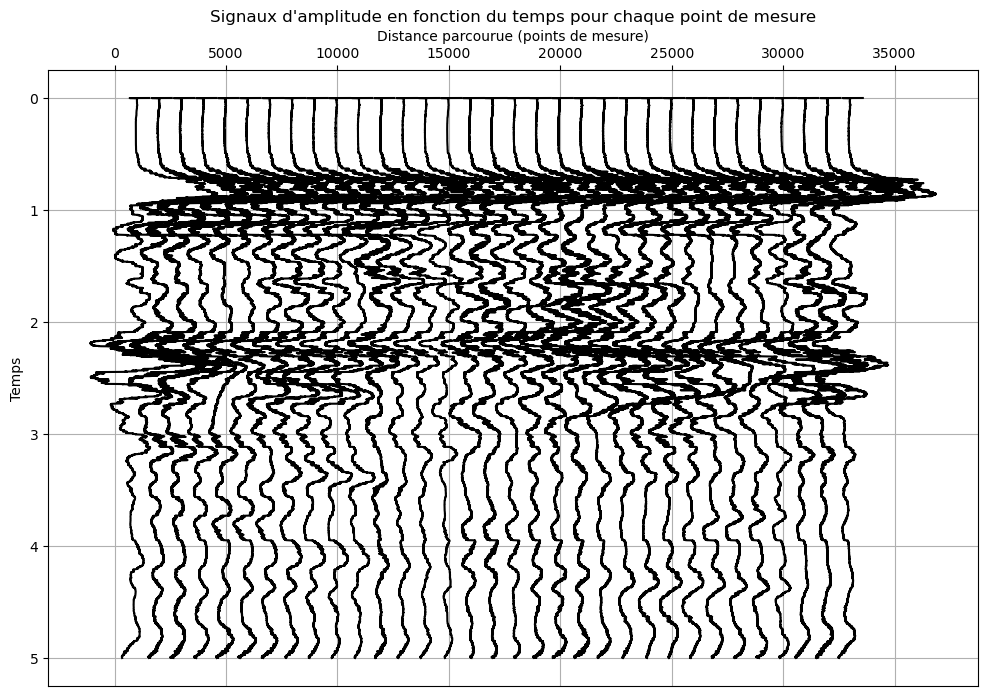

In [48]:
amplitude_matrix_path = r"C:\Users\kamar\OneDrive\Bureau\stage\Experimentation\Experimentation\2e essai- petit bac et petit tuyau au milieu\12,5L2-petit bac et tuyau au milieu matrix.csv"
amplitude_matrix_df = pd.read_csv(amplitude_matrix_path, index_col=0)

# Convertir les données en une matrice pour faciliter la manipulation
amplitude_matrix = amplitude_matrix_df.values
plt.figure(figsize=(12, 8))

# Décalage vertical pour chaque courbe pour éviter le chevauchement
offset = 1000

# Tracer les signaux pour chaque point de mesure en fonction du temps
for i in range(amplitude_matrix.shape[1]):
    plt.plot(amplitude_matrix[:, i] + i * offset, amplitude_matrix_df.index, color='k')

# Inverser l'axe y pour que le temps soit vertical
plt.gca().invert_yaxis()

# Placer l'axe x en haut
plt.gca().xaxis.set_ticks_position('top')
plt.gca().xaxis.set_label_position('top')

# Ajouter les étiquettes et le titre
plt.xlabel('Distance parcourue (points de mesure)')
plt.ylabel('Temps')
plt.title('Signaux d\'amplitude en fonction du temps pour chaque point de mesure')
plt.grid(True)

# Afficher le graphique
plt.show()

In [56]:
def crop_amplitude_matrix(amplitude_matrix, amplitude_df):
    # Demander les paramètres de découpe à l'utilisateur
    cut_top = int(input("Entrez la valeur pour couper la partie supérieure: "))
    cut_bottom = int(input("Entrez la valeur pour couper la partie inférieure: "))
    cut_left = int(input("Entrez la valeur pour couper la partie gauche: "))
    cut_right = int(input("Entrez la valeur pour couper la partie droite: "))
    
    # Couper les parties supérieure, inférieure, droite et gauche
    amplitude_matrix_cropped = amplitude_matrix[cut_top:-cut_bottom, cut_left:-cut_right]
    index_cropped = amplitude_matrix_df.index[cut_top:-cut_bottom]  # nouveau intervalle de temps

    # Créer un nouveau DataFrame avec les valeurs découpées
    columns_cropped = amplitude_matrix_df.columns[cut_left:-cut_right]
    amplitude_df_cropped = pd.DataFrame(amplitude_matrix_cropped, columns=columns_cropped, index=index_cropped)
    
    return amplitude_matrix_cropped, index_cropped, amplitude_df_cropped

# Exécution de la fonction de prétraitement
amplitude_matrix_cropped, index_cropped, amplitude_df_cropped = crop_amplitude_matrix(amplitude_matrix_df.values, amplitude_matrix_df)

Entrez la valeur pour couper la partie supérieure:  1500
Entrez la valeur pour couper la partie inférieure:  4900
Entrez la valeur pour couper la partie gauche:  1
Entrez la valeur pour couper la partie droite:  1


In [58]:
amplitude_df_cropped.to_csv(r"C:\Users\kamar\OneDrive\Bureau\stage\Experimentation\Experimentation\2e essai- petit bac et petit tuyau au milieu\12,5L2-petit bac et tuyau au milieu matrix modifiee.csv")

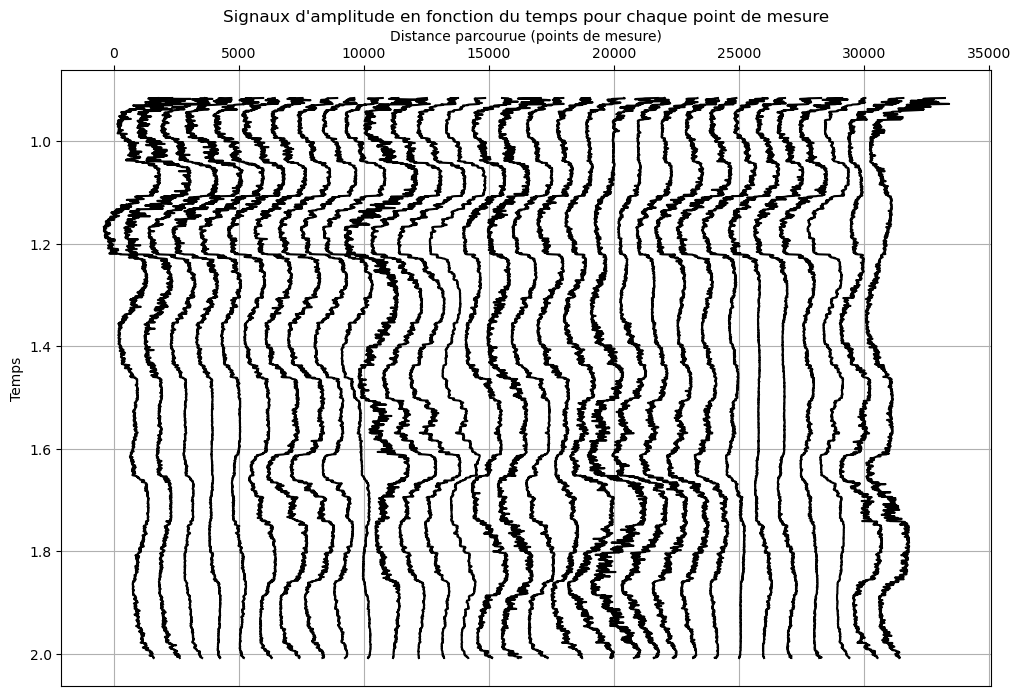

In [62]:
amplitude_matrix_path =r"C:\Users\kamar\OneDrive\Bureau\stage\Experimentation\Experimentation\2e essai- petit bac et petit tuyau au milieu\12,5L2-petit bac et tuyau au milieu matrix modifiee.csv"
amplitude_matrix_df = pd.read_csv(amplitude_matrix_path, index_col=0)

# Convertir les données en une matrice pour faciliter la manipulation
amplitude_matrix = amplitude_matrix_df.values
plt.figure(figsize=(12, 8))

# Décalage vertical pour chaque courbe pour éviter le chevauchement
offset = 1000

# Tracer les signaux pour chaque point de mesure en fonction du temps
for i in range(amplitude_matrix.shape[1]):
    plt.plot(amplitude_matrix[:, i] + i * offset, amplitude_matrix_df.index, color='k')

# Inverser l'axe y pour que le temps soit vertical
plt.gca().invert_yaxis()

# Placer l'axe x en haut
plt.gca().xaxis.set_ticks_position('top')
plt.gca().xaxis.set_label_position('top')

# Ajouter les étiquettes et le titre
plt.xlabel('Distance parcourue (points de mesure)')
plt.ylabel('Temps')
plt.title('Signaux d\'amplitude en fonction du temps pour chaque point de mesure')
plt.grid(True)

# Afficher le graphique
plt.show()

Limon2-petit bac et tuyau au milieu

In [64]:
asc_file_path3= r"C:\Users\kamar\OneDrive\Bureau\stage\Experimentation\Experimentation\2e essai- petit bac et petit tuyau au milieu\Limon2-petit bac et tuyau au milieu.ASC"
csv_file_path3=r"C:\Users\kamar\OneDrive\Bureau\stage\Experimentation\Experimentation\2e essai- petit bac et petit tuyau au milieu\Limon2-petit bac et tuyau au milieu.csv"
df = read_and_save_asc(asc_file_path3, csv_file_path3)

Le fichier CSV a été sauvegardé sous C:\Users\kamar\OneDrive\Bureau\stage\Experimentation\Experimentation\2e essai- petit bac et petit tuyau au milieu\Limon2-petit bac et tuyau au milieu.csv


In [67]:
df

,temps,amplitude
0,0.000000,1677.000000
1,0.000610,682.000000
2,0.001221,894.000000
3,0.001831,988.000000
4,0.002441,1024.000000
...,...,...
286715,4.996948,871.000000
286716,4.997559,888.000000
286717,4.998169,878.000000
286718,4.998779,877.000000


In [69]:
intervals = find_intervals(df)
segments = create_segments(df, intervals)
time_intervals, line_counts = calculate_intervals_and_counts(segments)


[[0, 8192], [8192, 16384], [16384, 24576], [24576, 32768], [32768, 40960], [40960, 49152], [49152, 57344], [57344, 65536], [65536, 73728], [73728, 81920], [81920, 90112], [90112, 98304], [98304, 106496], [106496, 114688], [114688, 122880], [122880, 131072], [131072, 139264], [139264, 147456], [147456, 155648], [155648, 163840], [163840, 172032], [172032, 180224], [180224, 188416], [188416, 196608], [196608, 204800], [204800, 212992], [212992, 221184], [221184, 229376], [229376, 237568], [237568, 245760], [245760, 253952], [253952, 262144], [262144, 270336], [270336, 278528], [278528, 286720]]
Nombre de segments: 35
Segment 1:
         temps    amplitude
0     0.000000  1677.000000
1     0.000610   682.000000
2     0.001221   894.000000
3     0.001831   988.000000
4     0.002441  1024.000000
...        ...          ...
8187  4.996948   925.000000
8188  4.997559   926.000000
8189  4.998169   924.000000
8190  4.998779   927.000000
8191  4.999390   927.000000

[8192 rows x 2 columns]

Segm

In [71]:
amplitude_df = generate_amplitude_matrix(segments)
amplitude_df

,Point 1,Point 2,Point 3,Point 4,Point 5,Point 6,Point 7,Point 8,Point 9,Point 10,...,Point 26,Point 27,Point 28,Point 29,Point 30,Point 31,Point 32,Point 33,Point 34,Point 35
0.000000,1677.0,1684.0,1671.0,1677.0,1674.0,1685.0,1676.0,1686.0,1678.0,1679.0,...,1682.0,1683.0,1680.0,1684.0,1678.0,1672.0,1692.0,1676.0,1675.0,1677.0
0.000610,682.0,667.0,667.0,669.0,669.0,680.0,680.0,678.0,670.0,680.0,...,687.0,672.0,676.0,669.0,665.0,659.0,666.0,670.0,668.0,675.0
0.001221,894.0,884.0,881.0,877.0,879.0,894.0,893.0,887.0,889.0,885.0,...,898.0,892.0,887.0,888.0,873.0,875.0,879.0,880.0,887.0,889.0
0.001831,988.0,980.0,981.0,975.0,980.0,983.0,987.0,990.0,980.0,980.0,...,992.0,980.0,971.0,977.0,969.0,974.0,963.0,973.0,970.0,981.0
0.002441,1024.0,1015.0,1013.0,1014.0,1014.0,1018.0,1015.0,1021.0,1014.0,1018.0,...,1014.0,1019.0,1005.0,1005.0,1006.0,1010.0,1008.0,1004.0,1001.0,1020.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4.996948,925.0,997.0,1018.0,1057.0,1059.0,1060.0,1061.0,1060.0,1064.0,1064.0,...,1090.0,1095.0,1080.0,1088.0,1093.0,1047.0,1039.0,989.0,937.0,871.0
4.997559,926.0,1002.0,1016.0,1049.0,1058.0,1059.0,1060.0,1058.0,1071.0,1070.0,...,1082.0,1094.0,1097.0,1089.0,1094.0,1064.0,1034.0,972.0,933.0,888.0
4.998169,924.0,991.0,1016.0,1059.0,1054.0,1062.0,1061.0,1063.0,1064.0,1066.0,...,1085.0,1089.0,1095.0,1081.0,1092.0,1057.0,1034.0,966.0,950.0,878.0
4.998779,927.0,988.0,1012.0,1056.0,1064.0,1066.0,1063.0,1061.0,1069.0,1061.0,...,1101.0,1092.0,1094.0,1085.0,1086.0,1063.0,1042.0,980.0,921.0,877.0


In [73]:
amplitude_df.to_csv( r"C:\Users\kamar\OneDrive\Bureau\stage\Experimentation\Experimentation\2e essai- petit bac et petit tuyau au milieu\Limon2-petit bac et tuyau au milieu matrix.csv")

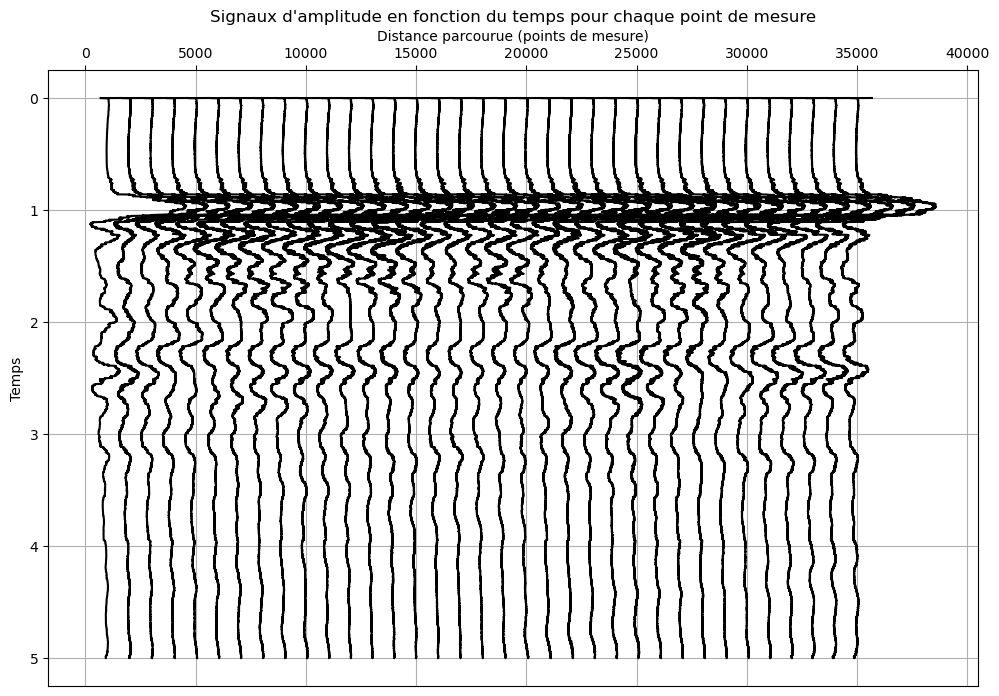

In [75]:
amplitude_matrix_path = r"C:\Users\kamar\OneDrive\Bureau\stage\Experimentation\Experimentation\2e essai- petit bac et petit tuyau au milieu\Limon2-petit bac et tuyau au milieu matrix.csv"
amplitude_matrix_df = pd.read_csv(amplitude_matrix_path, index_col=0)

# Convertir les données en une matrice pour faciliter la manipulation
amplitude_matrix = amplitude_matrix_df.values
plt.figure(figsize=(12, 8))

# Décalage vertical pour chaque courbe pour éviter le chevauchement
offset = 1000

# Tracer les signaux pour chaque point de mesure en fonction du temps
for i in range(amplitude_matrix.shape[1]):
    plt.plot(amplitude_matrix[:, i] + i * offset, amplitude_matrix_df.index, color='k')

# Inverser l'axe y pour que le temps soit vertical
plt.gca().invert_yaxis()

# Placer l'axe x en haut
plt.gca().xaxis.set_ticks_position('top')
plt.gca().xaxis.set_label_position('top')

# Ajouter les étiquettes et le titre
plt.xlabel('Distance parcourue (points de mesure)')
plt.ylabel('Temps')
plt.title('Signaux d\'amplitude en fonction du temps pour chaque point de mesure')
plt.grid(True)

# Afficher le graphique
plt.show()

In [77]:
def crop_amplitude_matrix(amplitude_matrix, amplitude_df):
    # Demander les paramètres de découpe à l'utilisateur
    cut_top = int(input("Entrez la valeur pour couper la partie supérieure: "))
    cut_bottom = int(input("Entrez la valeur pour couper la partie inférieure: "))
    cut_left = int(input("Entrez la valeur pour couper la partie gauche: "))
    cut_right = int(input("Entrez la valeur pour couper la partie droite: "))
    
    # Couper les parties supérieure, inférieure, droite et gauche
    amplitude_matrix_cropped = amplitude_matrix[cut_top:-cut_bottom, cut_left:-cut_right]
    index_cropped = amplitude_matrix_df.index[cut_top:-cut_bottom]  # nouveau intervalle de temps

    # Créer un nouveau DataFrame avec les valeurs découpées
    columns_cropped = amplitude_matrix_df.columns[cut_left:-cut_right]
    amplitude_df_cropped = pd.DataFrame(amplitude_matrix_cropped, columns=columns_cropped, index=index_cropped)
    
    return amplitude_matrix_cropped, index_cropped, amplitude_df_cropped

# Exécution de la fonction de prétraitement
amplitude_matrix_cropped, index_cropped, amplitude_df_cropped = crop_amplitude_matrix(amplitude_matrix_df.values, amplitude_matrix_df)

Entrez la valeur pour couper la partie supérieure:  1500
Entrez la valeur pour couper la partie inférieure:  4900
Entrez la valeur pour couper la partie gauche:  1
Entrez la valeur pour couper la partie droite:  1


In [79]:
amplitude_df_cropped.to_csv(r"C:\Users\kamar\OneDrive\Bureau\stage\Experimentation\Experimentation\2e essai- petit bac et petit tuyau au milieu\Limon2-petit bac et tuyau au milieu matrix modifiee.csv")

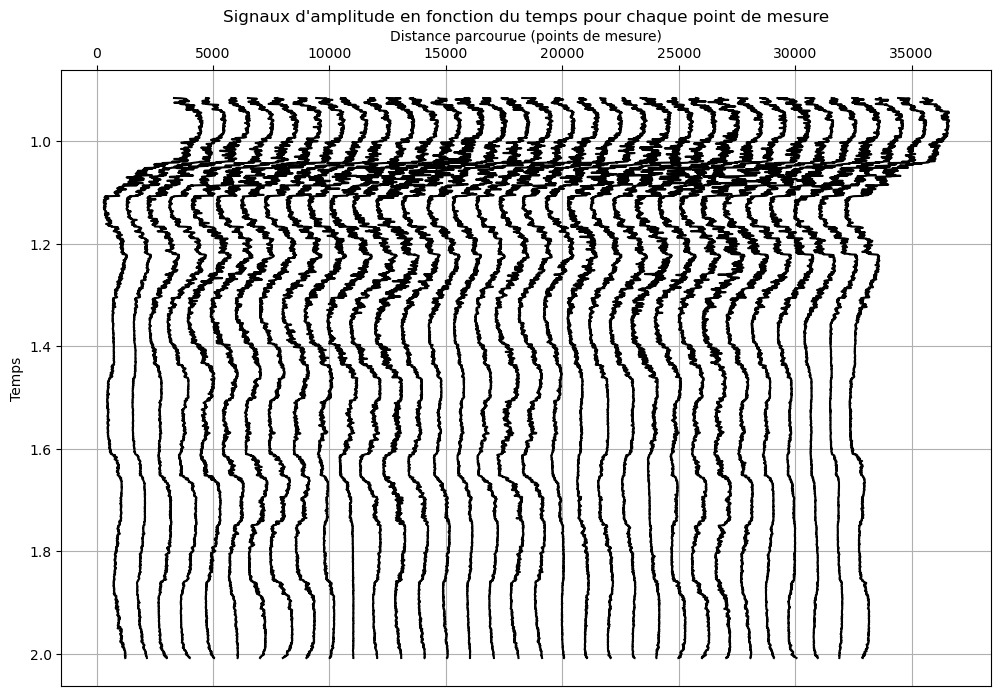

In [81]:
amplitude_matrix_path =r"C:\Users\kamar\OneDrive\Bureau\stage\Experimentation\Experimentation\2e essai- petit bac et petit tuyau au milieu\Limon2-petit bac et tuyau au milieu matrix modifiee.csv"
amplitude_matrix_df = pd.read_csv(amplitude_matrix_path, index_col=0)

# Convertir les données en une matrice pour faciliter la manipulation
amplitude_matrix = amplitude_matrix_df.values
plt.figure(figsize=(12, 8))

# Décalage vertical pour chaque courbe pour éviter le chevauchement
offset = 1000

# Tracer les signaux pour chaque point de mesure en fonction du temps
for i in range(amplitude_matrix.shape[1]):
    plt.plot(amplitude_matrix[:, i] + i * offset, amplitude_matrix_df.index, color='k')

# Inverser l'axe y pour que le temps soit vertical
plt.gca().invert_yaxis()

# Placer l'axe x en haut
plt.gca().xaxis.set_ticks_position('top')
plt.gca().xaxis.set_label_position('top')

# Ajouter les étiquettes et le titre
plt.xlabel('Distance parcourue (points de mesure)')
plt.ylabel('Temps')
plt.title('Signaux d\'amplitude en fonction du temps pour chaque point de mesure')
plt.grid(True)

# Afficher le graphique
plt.show()